In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os

#### Feature Engineering

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

#### metrics

In [61]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#### ML models

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [63]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [64]:
df_train = pd.read_csv(r'D:\Jupyter Notebook\Big Mart\train.csv')
df_test = pd.read_csv(r'D:\Jupyter Notebook\Big Mart\test.csv')

### First Look at data

In [8]:
# Training set

In [9]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Testing set

In [11]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


# Preprocessing 

## 1) Missing Values

In [13]:
print("Train:\n")
print(df_train.isnull().sum().sort_values(ascending=False),"\n\n",df_train.isnull().sum()/df_train.shape[0] *100,"\n\n")
print("Test:\n")
print(df_test.isnull().sum().sort_values(ascending=False),"\n\n",df_test.isnull().sum()/df_test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

## 2) Handling Numerical Null values with Mean

Text(0.5, 1.0, 'Item_Weight Boxplot')

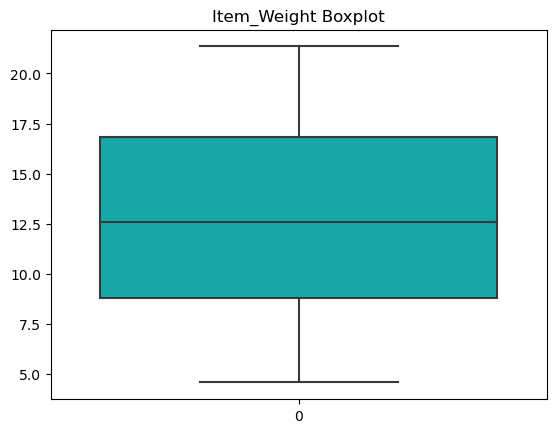

In [14]:
sns.boxplot(data=df_train['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [15]:
## No outliers, so mean value

In [16]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace = True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace = True)

In [17]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## 3) Handling Categorical Null values with Mode

In [19]:
df_train['Outlet_Size'].mode()
df_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace = True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace = True)

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Splitting into Categorical and Numerical data

In [23]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  df_train[num]
#categoric df
BM_cat = df_train[cat]

#print(num)
#print(cat)

[df_train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

### Repeating values with different names in the Item_Fat_Content column

In [24]:
#train
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Changing Outlet_Establishment_Year to a new column with the age and the new name will be Outlet_Age

In [25]:
df_train['Outlet_Age'], df_test['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

df_train['Outlet_Age'].head
df_test['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

# Data Visualisation

## 1) Univariate Plots (for categorical columns)

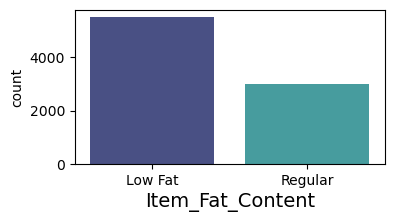

In [26]:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(4,2))
sns.countplot(x='Item_Fat_Content' , data=df_train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

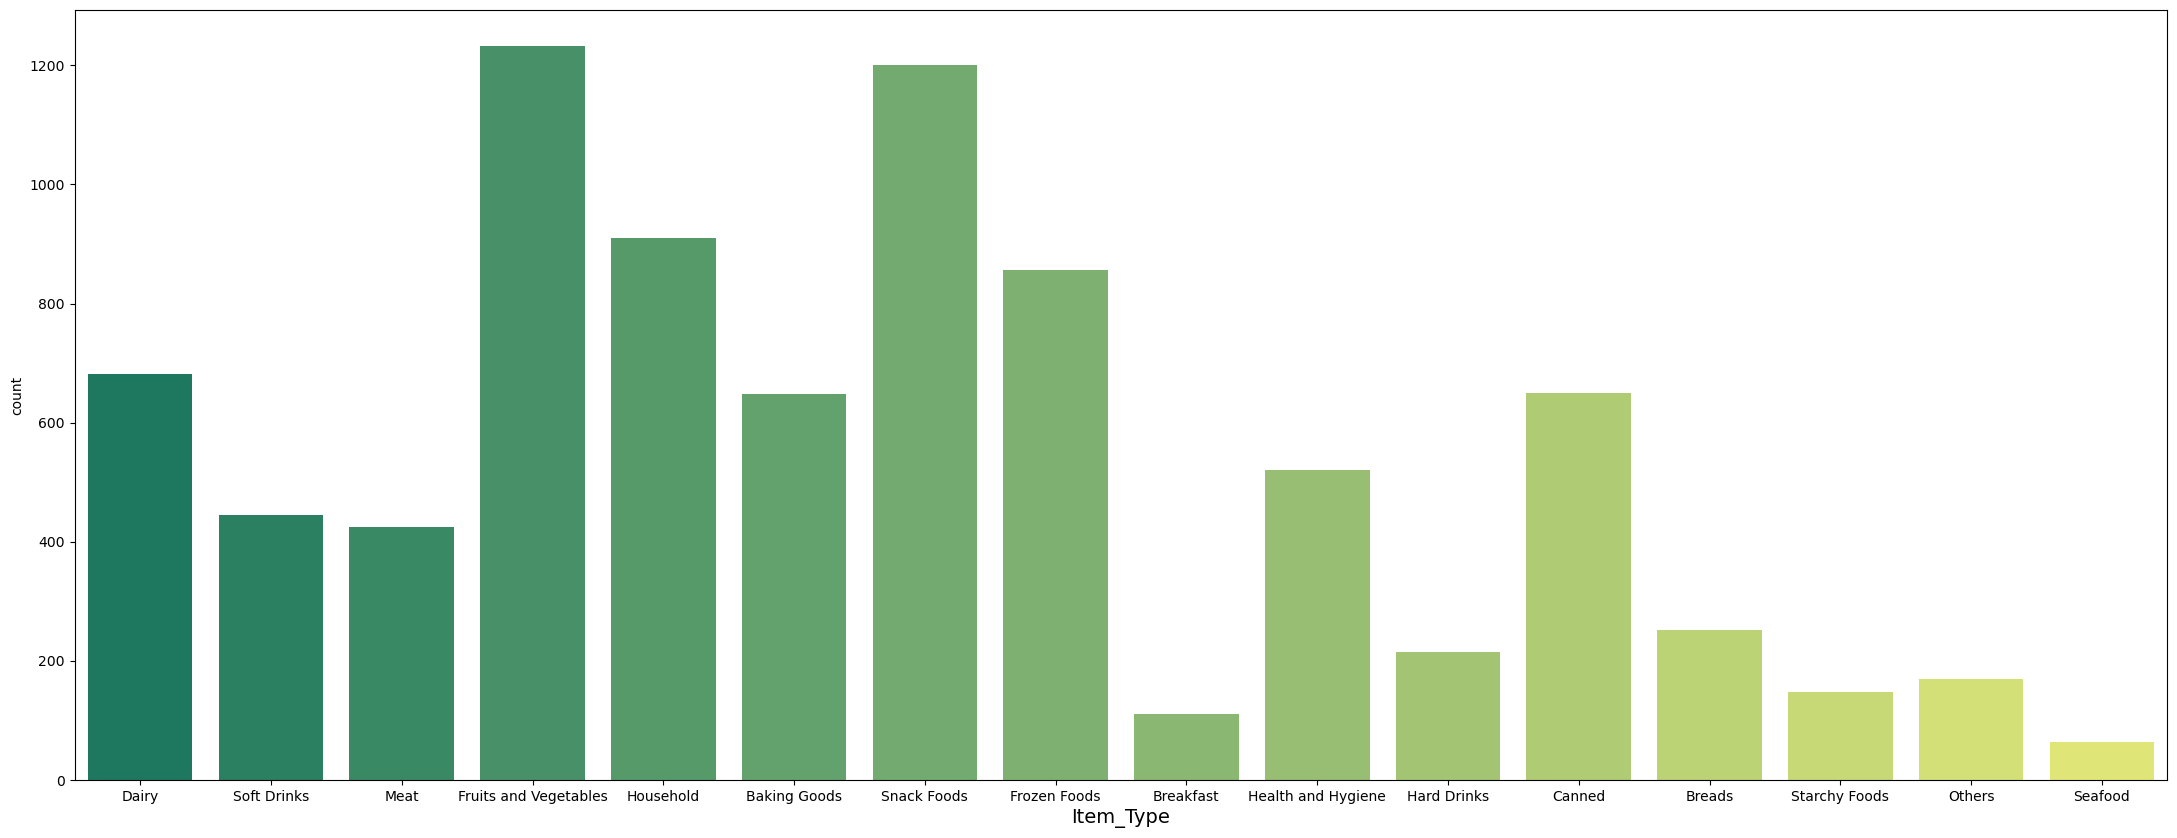

In [27]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df_train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

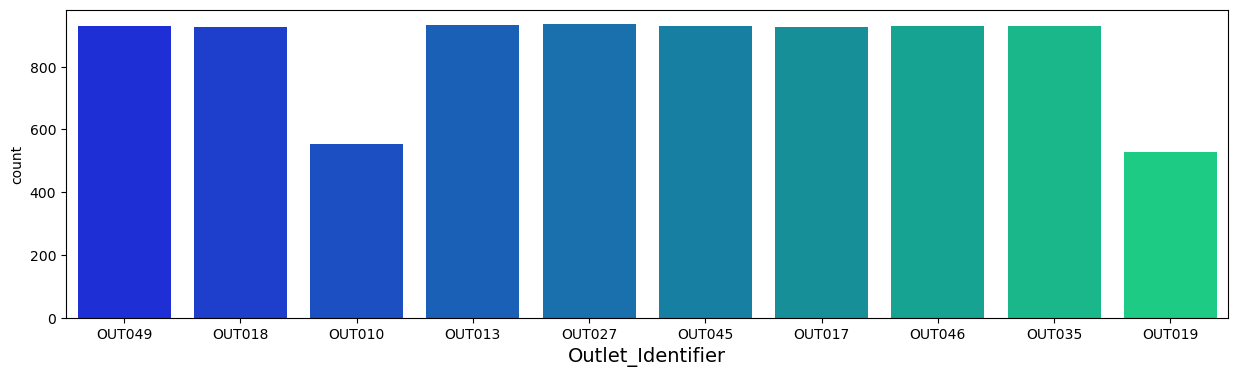

In [28]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

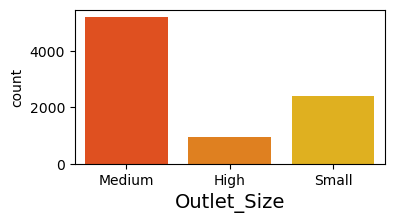

In [29]:
plt.figure(figsize=(4,2))
sns.countplot(x='Outlet_Size' , data=df_train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

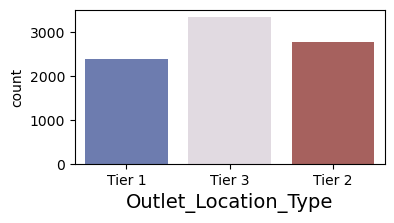

In [30]:
plt.figure(figsize=(4,2))
sns.countplot(x='Outlet_Location_Type' , data=df_train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

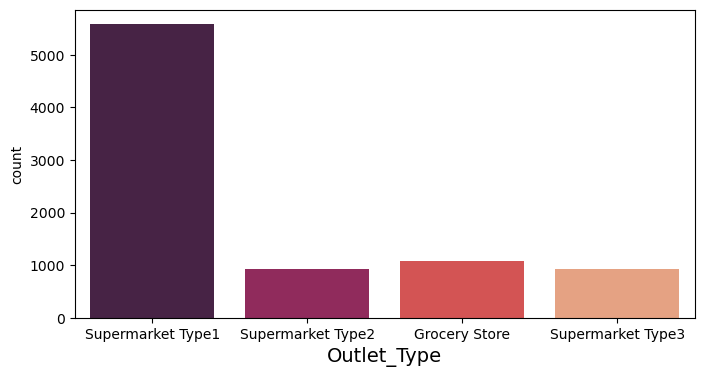

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Type' , data=df_train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

## 2) Numerical columns

In [32]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()

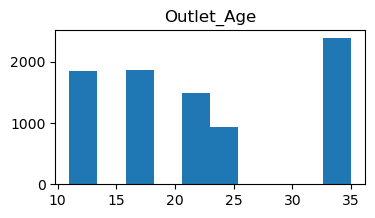

In [33]:
#numeric df
BM_num =  df_train[num]

plt.figure(figsize=(4,2))
plt.hist(df_train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

In [34]:
## Scatter Plots

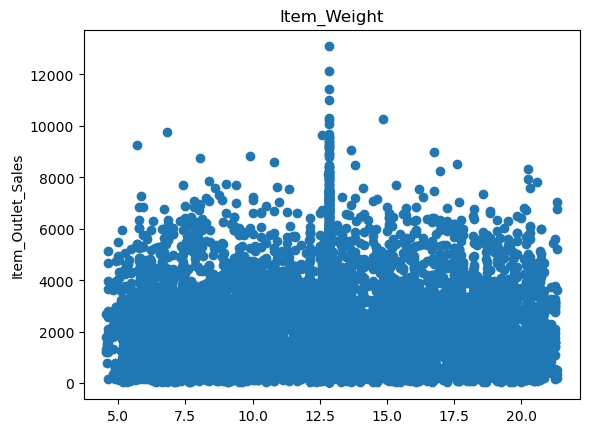

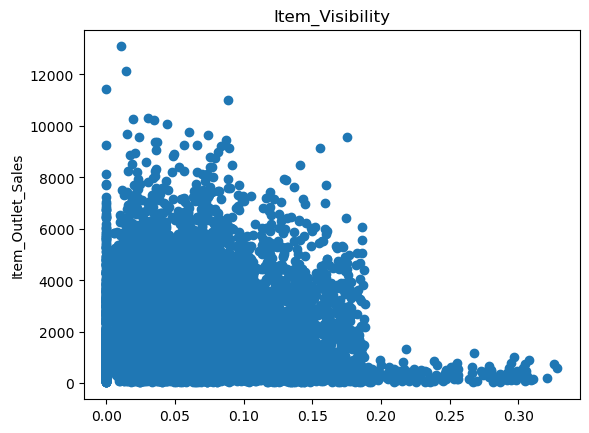

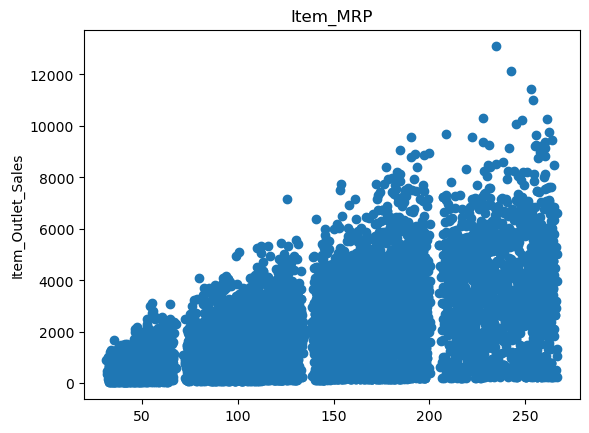

In [35]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

## Multivariate Plots for Item_Outlet_Sales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


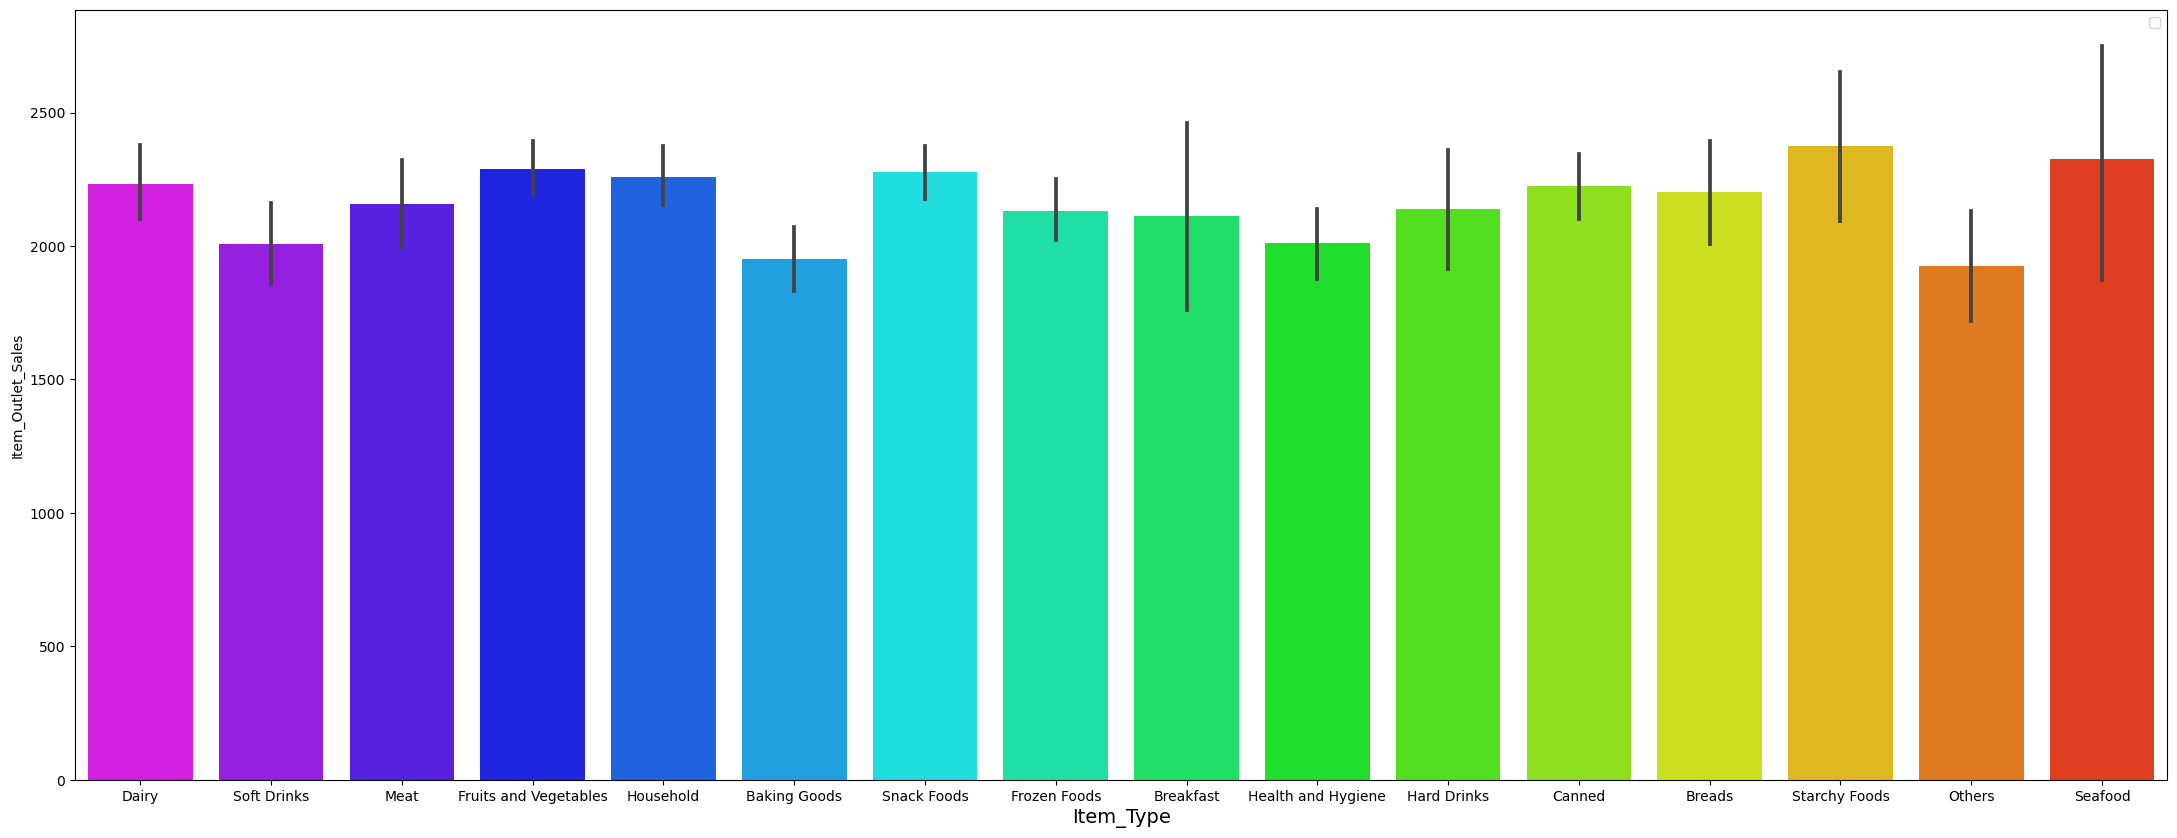

In [36]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y= 'Item_Outlet_Sales', data=df_train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


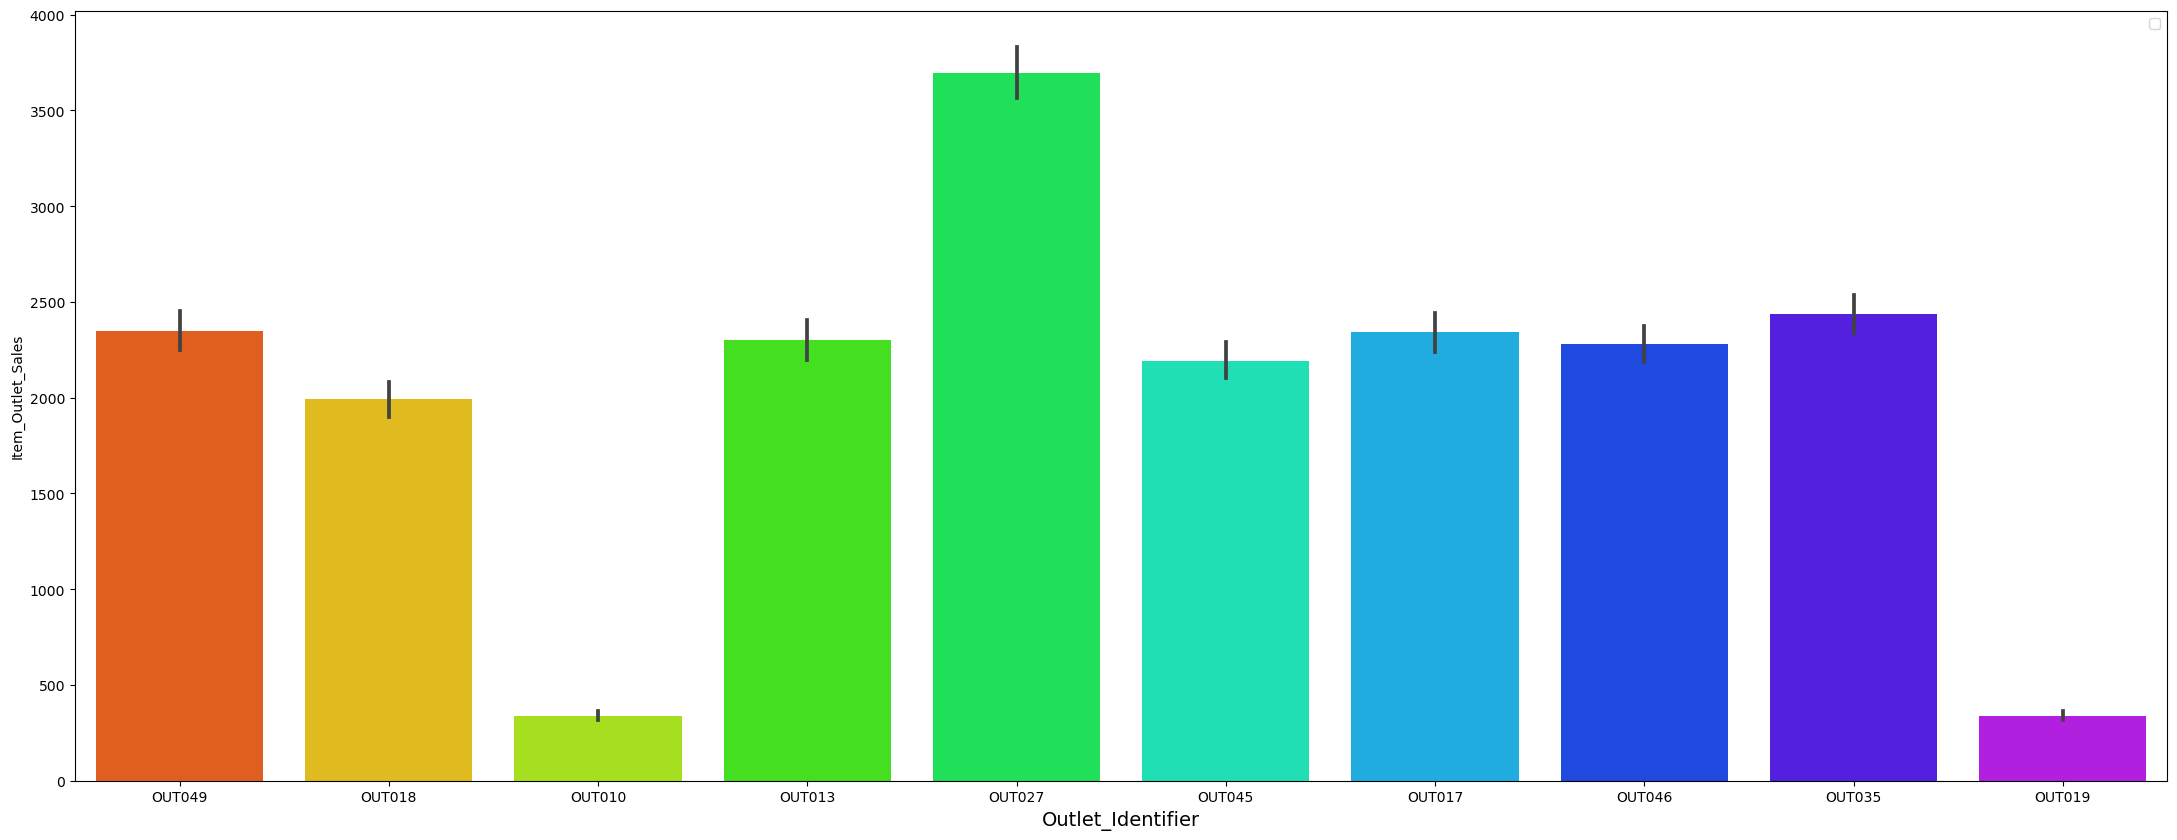

In [37]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=df_train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


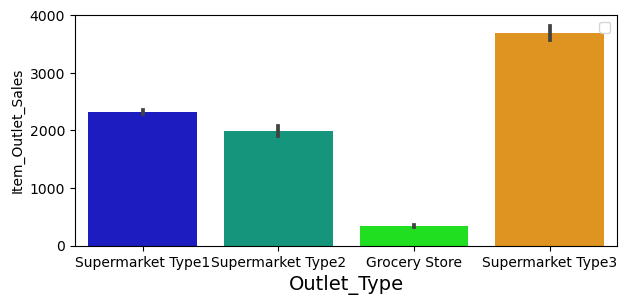

In [38]:
plt.figure(figsize=(7,3))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=df_train ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


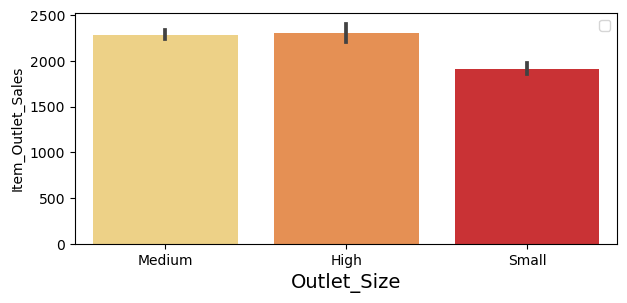

In [39]:
plt.figure(figsize=(7,3))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=df_train ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


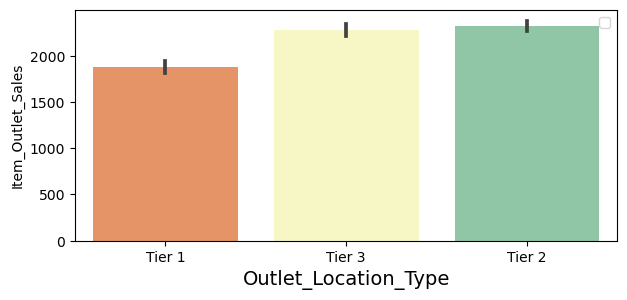

In [40]:
plt.figure(figsize=(7,3))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=df_train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

## Correlational Matrix

<Axes: >

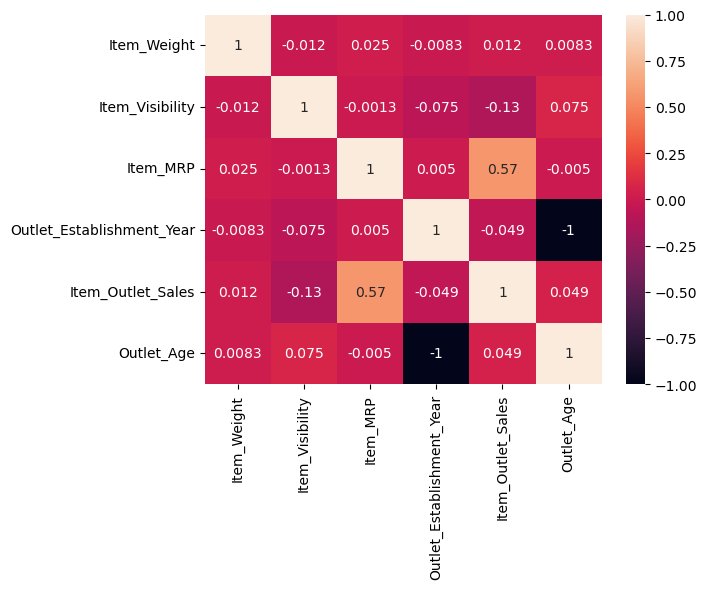

In [41]:
sns.heatmap(df_train.corr() ,annot = True,cmap='rocket')

# Feature Engineering

### 1) Label Encoding

In [42]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


### 2) One Hot Encoding on Outlet_Type and Item_Type

In [46]:
cols = ['Item_Type','Outlet_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df_train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df_train.index
te_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([df_train, tr_oh], axis=1)
te_fe = pd.concat([df_test, te_oh], axis=1)

### 3) Drop Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier

In [47]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [48]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine Learning Models

In [ ]:
# divide our dataset into two variables X as the features and y as the Item_Outlet_Sales the target value we want to predict.

### Data Splitting

In [49]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [50]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### 1) Linear Regression

In [67]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [68]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

### 2)Random Forest Regressor

In [69]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)


 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.54
0.52
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5499


In [70]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

### 3) Lasso Regressor

In [71]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [72]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")

In [73]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.07,1285554.86,0.5594,0.5581
0,Linear Regression,838.19,1285793.54,0.5593,0.5580
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.5920
